In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-housing-prices-paid/price_paid_records.csv


In [3]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#IMPORTING DATASET
house_ukp = pd.read_csv("/kaggle/input/uk-housing-prices-paid/price_paid_records.csv")


In [5]:
house_ukp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB


In [6]:
house_ukp.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


In [7]:
f_hold = house_ukp[house_ukp.Duration =='F']
f_hold

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489342,{4C4EE000-2919-1854-E050-A8C063054F34},103000,2017-02-09 00:00,S,N,F,PONTEFRACT,WAKEFIELD,WEST YORKSHIRE,A,A
22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A


In [8]:
#TOP FIVE CITIES WITH FREEHOLD PROPERTIES
f_hold.groupby('Town/City').count()['Duration'].sort_values(ascending=False).head()

Town/City
LONDON        650451
NOTTINGHAM    262880
BRISTOL       260392
BIRMINGHAM    245645
LEEDS         213614
Name: Duration, dtype: int64

In [9]:
#Dataframe for countries with most frehold properties
f_country = f_hold["County"].value_counts().head(10)
f_country = pd.DataFrame(f_country).reset_index()


In [10]:
f_country.head()

,County,count
0,GREATER LONDON,1447376
1,WEST YORKSHIRE,731790
2,WEST MIDLANDS,685834
3,KENT,531674
4,ESSEX,517449


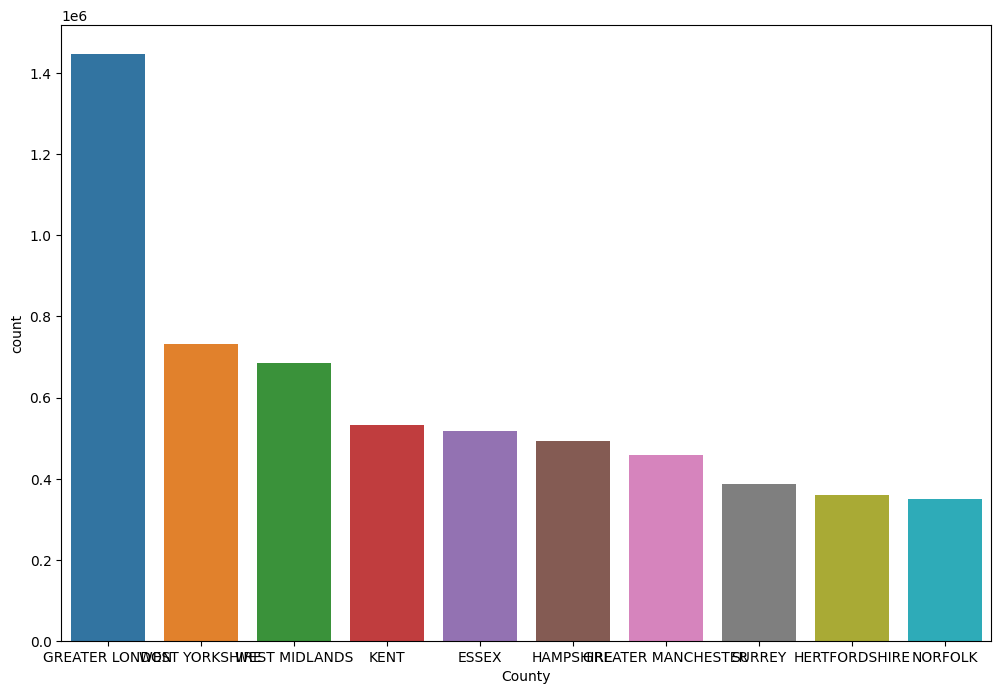

In [11]:
#Visulation for countries with the most freehold properties
plt.figure(figsize=(12,8))
ax = sns.barplot(data =f_country , x = "County", y = "count")

In [36]:
#Extracting established residential building
f_es = house_ukp[house_ukp['Old/New'] =='N']
f_es

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A


<Axes: ylabel='Property Type'>

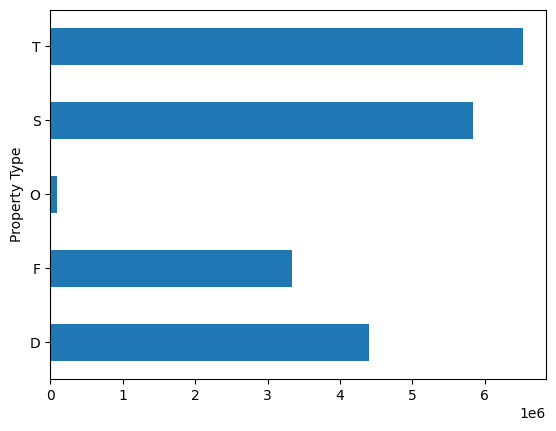

In [37]:
#Visulisation of each Property type that are established residential buildings
f_es.groupby('Property Type').count()['Old/New'].plot.barh()

In [38]:
#Property types that are newly built
f_new = house_ukp[house_ukp['Old/New'] == 'Y']
f_new

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
24,{09146794-A5D5-4C52-8E66-49572C251193},184500,1995-03-22 00:00,D,Y,F,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
25,{FCF5FBAE-CC59-417C-94F2-4957374E5EB4},70000,1995-12-08 00:00,S,Y,F,BANBURY,CHERWELL,OXFORDSHIRE,A,A
40,{E9B43BCF-A64C-4B1B-98D6-4239956F2F2A},255000,1995-06-30 00:00,D,Y,F,BRISTOL,WOODSPRING,AVON,A,A
45,{11235ABE-338B-4AD5-AFC4-3EA9B7670E08},60000,1995-08-25 00:00,D,Y,F,MIDDLESBROUGH,MIDDLESBROUGH,MIDDLESBROUGH,A,A
60,{F37BFDE1-3649-453C-89BD-4239B3E877EF},44500,1995-03-17 00:00,F,Y,L,EASTBOURNE,EASTBOURNE,EAST SUSSEX,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22488449,{50F18103-E7FB-9FD5-E050-A8C063054923},55000,2017-02-15 00:00,F,Y,L,GREAT YARMOUTH,GREAT YARMOUTH,NORFOLK,B,A
22488450,{50F18103-E7FC-9FD5-E050-A8C063054923},55000,2017-02-15 00:00,F,Y,L,GREAT YARMOUTH,GREAT YARMOUTH,NORFOLK,B,A
22488552,{4E95D757-1C91-EDA1-E050-A8C0630539E2},168500,2017-01-30 00:00,F,Y,L,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,A,A
22488555,{4E95D757-1C96-EDA1-E050-A8C0630539E2},600000,2017-03-28 00:00,F,Y,L,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,A,A


In [40]:
f_new.groupby('Property Type').count()['Old/New'].sort_values(ascending=False).head()

Property Type
D    770201
F    740815
T    399113
S    380843
O      5700
Name: Old/New, dtype: int64

<Axes: ylabel='Property Type'>

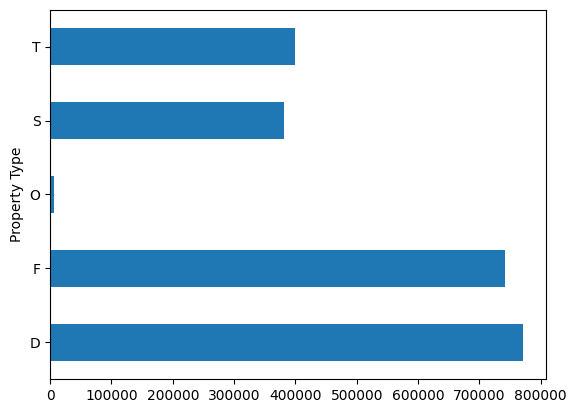

In [41]:
#visualisation of the above
f_new.groupby('Property Type').count()['Old/New'].plot.barh()